In [1]:
# ML용 공통 코드

# 파이썬
# ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 좀 더 고급화하기 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
# 0.20 이상 버전에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해 시드 고정
# 데이터를 분할할 때 동일한 분할을 만들어 냄
np.random.seed(21)


### 위스콘신의 유방암 데이터 셋에 XG Boost 적용

In [9]:
# 데이터 가져오기

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

X_features = dataset.data
y_target = dataset.target

cancerDF = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancerDF['target'] = y_target

# 데이터의 분포 확인
#print(cancerDF.head())
#print(cancerDF.columns) # 31개 컬럼
print(cancerDF['target'].value_counts()) # 0과 1 2가지

1    357
0    212
Name: target, dtype: int64


In [13]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                   test_size = 0.2, random_state = 21)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [16]:
# XG Boost 를 이용하는 경우의 데이터 생성

import xgboost as xgb

# 데이터를 데이터 매트릭스 형태로 생성
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest =  xgb.DMatrix(data = X_test, label = y_test)

In [31]:
# 하이퍼 파라미터 설정

# eta 는 학습률
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss'
}
num_rounds = 500

# 훈련 데이터와 검증 데이터 생성
# 훈련 데이터와 테스트 데이터를 묶어서 생성
#wlist = [(dtrain, 'train data'), (dtest, 'test data')]
wlist = [(dtrain,'train'),(dtest,'test')]

# 모델 생성
# 사용할 파라미터, 훈련 데이터, 조기 종료 등을 지정
# early_stopping_rounds 는 조기 종료 옵션
xgb_model = xgb.train(params = params , dtrain=dtrain ,
                num_boost_round=num_rounds , 
                early_stopping_rounds=100, evals=wlist )
    

# 예측 - 확률 계산
pred_probs = xgb_model.predict(dtest)
print(pred_probs[:10])

[0]	train-logloss:0.61077	test-logloss:0.61679
[1]	train-logloss:0.54243	test-logloss:0.55437
[2]	train-logloss:0.48571	test-logloss:0.50470
[3]	train-logloss:0.43755	test-logloss:0.46212
[4]	train-logloss:0.39543	test-logloss:0.42423
[5]	train-logloss:0.35918	test-logloss:0.39221
[6]	train-logloss:0.32736	test-logloss:0.36426
[7]	train-logloss:0.29966	test-logloss:0.34007
[8]	train-logloss:0.27469	test-logloss:0.31612
[9]	train-logloss:0.25163	test-logloss:0.29400
[10]	train-logloss:0.23210	test-logloss:0.27486
[11]	train-logloss:0.21368	test-logloss:0.25603
[12]	train-logloss:0.19822	test-logloss:0.23991
[13]	train-logloss:0.18338	test-logloss:0.22567
[14]	train-logloss:0.17081	test-logloss:0.21128
[15]	train-logloss:0.15861	test-logloss:0.19947
[16]	train-logloss:0.14807	test-logloss:0.18861
[17]	train-logloss:0.13807	test-logloss:0.18074
[18]	train-logloss:0.12973	test-logloss:0.17123
[19]	train-logloss:0.12153	test-logloss:0.16188
[20]	train-logloss:0.11400	test-logloss:0.15476
[2

[170]	train-logloss:0.00745	test-logloss:0.06725
[171]	train-logloss:0.00740	test-logloss:0.06767
[172]	train-logloss:0.00738	test-logloss:0.06787
[173]	train-logloss:0.00737	test-logloss:0.06770
[174]	train-logloss:0.00735	test-logloss:0.06727
[175]	train-logloss:0.00732	test-logloss:0.06719
[176]	train-logloss:0.00728	test-logloss:0.06760
[177]	train-logloss:0.00726	test-logloss:0.06780
[178]	train-logloss:0.00724	test-logloss:0.06774
[179]	train-logloss:0.00722	test-logloss:0.06759
[180]	train-logloss:0.00720	test-logloss:0.06743
[181]	train-logloss:0.00716	test-logloss:0.06785
[182]	train-logloss:0.00714	test-logloss:0.06828
[183]	train-logloss:0.00713	test-logloss:0.06839
[184]	train-logloss:0.00711	test-logloss:0.06833
[185]	train-logloss:0.00709	test-logloss:0.06793
[186]	train-logloss:0.00708	test-logloss:0.06775
[187]	train-logloss:0.00706	test-logloss:0.06797
[188]	train-logloss:0.00705	test-logloss:0.06782
[189]	train-logloss:0.00703	test-logloss:0.06801
[190]	train-logloss:

[338]	train-logloss:0.00552	test-logloss:0.06352
[339]	train-logloss:0.00551	test-logloss:0.06340
[340]	train-logloss:0.00550	test-logloss:0.06341
[341]	train-logloss:0.00550	test-logloss:0.06331
[342]	train-logloss:0.00549	test-logloss:0.06328
[343]	train-logloss:0.00548	test-logloss:0.06340
[344]	train-logloss:0.00548	test-logloss:0.06340
[345]	train-logloss:0.00547	test-logloss:0.06329
[346]	train-logloss:0.00546	test-logloss:0.06330
[347]	train-logloss:0.00546	test-logloss:0.06308
[348]	train-logloss:0.00545	test-logloss:0.06297
[349]	train-logloss:0.00545	test-logloss:0.06298
[350]	train-logloss:0.00544	test-logloss:0.06306
[351]	train-logloss:0.00543	test-logloss:0.06295
[352]	train-logloss:0.00543	test-logloss:0.06288
[353]	train-logloss:0.00542	test-logloss:0.06294
[354]	train-logloss:0.00542	test-logloss:0.06293
[355]	train-logloss:0.00541	test-logloss:0.06300
[356]	train-logloss:0.00541	test-logloss:0.06290
[357]	train-logloss:0.00540	test-logloss:0.06290
[358]	train-logloss:

In [28]:
# 확률을 가지고 실제 클래스를 예측
# 1 이 결과로 나오면 암
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print(preds[:10])

[1, 1, 0, 0, 0, 1, 1, 1, 1, 1]


In [22]:
# 평가 지표 확인
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [35]:
# 오차 행렬
confusion = confusion_matrix(y_test, preds)
print(confusion)

# 정확도
accuracy = accuracy_score(y_test, preds)
print(accuracy)

# 정밀도 - True 로 판별한 것 중 실제 True 인 비율
precision = precision_score(y_test, preds)
print(precision)

# 재현율 - 실제로 True 인 것 중 True 로 판별한 비율
recall = recall_score(y_test, preds)
print(recall)

# f1_score - 정밀도와 재현율의 조화 평균
# 데이터가 불균형할 때 중요함
f1 = f1_score(y_test, preds)
print(f1)

# roc_auc - 1에 가까울수록 좋은 수치
# 예측 결과가 아니라 확률을 입력해야 함
roc_auc = roc_auc_score(y_test, pred_probs)
print(roc_auc) # 0.997

[[36  3]
 [ 1 74]]
0.9649122807017544
0.961038961038961
0.9866666666666667
0.9736842105263157
0.9976068376068377


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

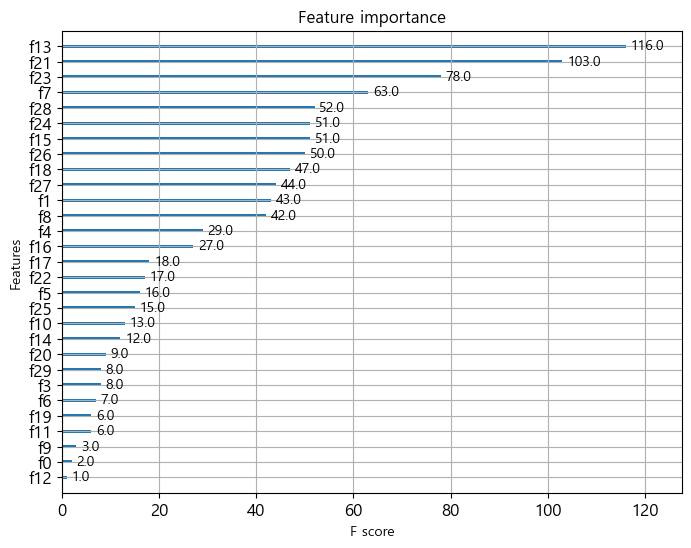

In [38]:
# feature 의 중요도 확인

from xgboost import plot_importance
# xg boost 의 plot_importance 를 사용해서 바로 그릴 수 있음

# subplot 을 생성하고 바로 plot_importance 에 적용
# importance 별로 정렬을 해서 그래프를 그림
fig, ax = plt.subplots(figsize = (8, 6))
plot_importance(xgb_model, ax = ax)

### 위스콘신 유방암 데이터에 Light GBM 적용

In [40]:
from lightgbm import LGBMClassifier

# 예측기의 갯수를 500개로 해서 Light GBM 모델 생성
lgbm_clf = LGBMClassifier(n_estimators = 500)

# 평가 데이터 생성
evals = [(X_test, y_test)]
# 학습
lgbm_clf.fit(X_train, y_train, eval_metric = 'logloss', eval_set = evals)

[1]	valid_0's binary_logloss: 0.577184
[2]	valid_0's binary_logloss: 0.518343
[3]	valid_0's binary_logloss: 0.471897
[4]	valid_0's binary_logloss: 0.430483
[5]	valid_0's binary_logloss: 0.395431
[6]	valid_0's binary_logloss: 0.362574
[7]	valid_0's binary_logloss: 0.330151
[8]	valid_0's binary_logloss: 0.305428
[9]	valid_0's binary_logloss: 0.282848
[10]	valid_0's binary_logloss: 0.264775
[11]	valid_0's binary_logloss: 0.248042
[12]	valid_0's binary_logloss: 0.233211
[13]	valid_0's binary_logloss: 0.21758
[14]	valid_0's binary_logloss: 0.201929
[15]	valid_0's binary_logloss: 0.191151
[16]	valid_0's binary_logloss: 0.181254
[17]	valid_0's binary_logloss: 0.172322
[18]	valid_0's binary_logloss: 0.161866
[19]	valid_0's binary_logloss: 0.156147
[20]	valid_0's binary_logloss: 0.149027
[21]	valid_0's binary_logloss: 0.141902
[22]	valid_0's binary_logloss: 0.135417
[23]	valid_0's binary_logloss: 0.129242
[24]	valid_0's binary_logloss: 0.12414
[25]	valid_0's binary_logloss: 0.119553
[26]	valid_

LGBMClassifier(n_estimators=500)

In [42]:
# 예측
preds = lgbm_clf.predict(X_test)
preds_proba = lgbm_clf.predict_proba(X_test)[:, 1]

print(preds[:10])
print(preds_proba[:10])

[1 1 0 0 0 1 1 1 1 1]
[1.000e+00 1.000e+00 2.291e-04 3.162e-07 1.659e-08 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00]


In [43]:
# 오차 행렬
confusion = confusion_matrix(y_test, preds)
print(confusion)

# 정확도 - 0.964
accuracy = accuracy_score(y_test, preds)
print(accuracy)

# 정밀도 - 0.961
precision = precision_score(y_test, preds)
print(precision)

# 재현율 - 0.987
recall = recall_score(y_test, preds)
print(recall)

# f1_score - 0.973
f1 = f1_score(y_test, preds)
print(f1)

# roc_auc - 0.997
roc_auc = roc_auc_score(y_test, pred_probs)
print(roc_auc)

# 모든 평가 지표가 이전과 큰 차이가 없음

[[36  3]
 [ 1 74]]
0.9649122807017544
0.961038961038961
0.9866666666666667
0.9736842105263157
0.9976068376068377


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

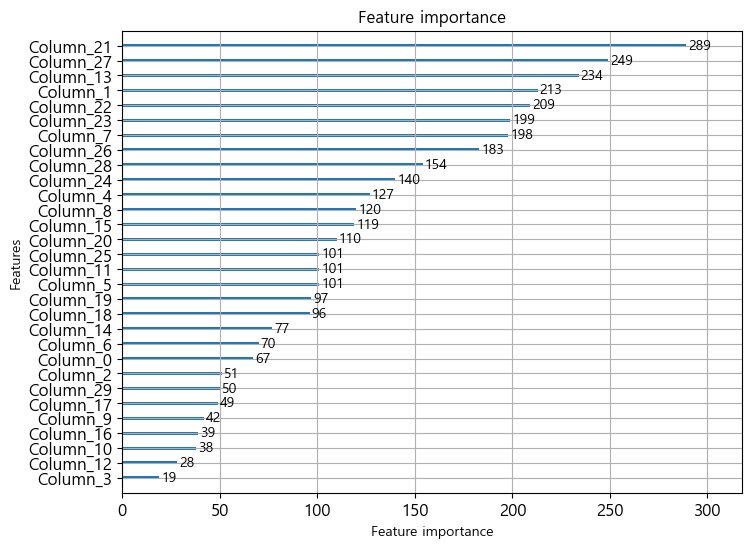

In [45]:
# feature 의 중요도 확인

from lightgbm import plot_importance`

fig, ax = plt.subplots(figsize = (8, 6))
plot_importance(lgbm_clf, ax = ax)

### 위스콘신 유방암 데이터를 가지고 개별 훈련기와 Stacking 의 차이 알아보기

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [54]:
# 개별 모델 생성

# knn에서 가장 중요한건 이웃의 수
knn_clf = KNeighborsClassifier(n_neighbors = 4)
dt_clf = DecisionTreeClassifier()
# n_estimators 는 몇 개의 트리를 사용할지
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 21)
ada_clf = AdaBoostClassifier(n_estimators = 100)

# 최종 모델 생성
lr_final_clf = LogisticRegression(C = 10)

In [55]:
# 개별 모델 훈련

knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [56]:
# 개별 훈련기의 정확도 측정

knn_pred = knn_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN의 정확도 :', accuracy_score(y_test, knn_pred))
print('Decision Tree의 정확도 :', accuracy_score(y_test, dt_pred))
print('Random Forest의 정확도 :', accuracy_score(y_test, rf_pred))
print('Ada Boost의 정확도 :', accuracy_score(y_test, ada_pred))
# 0.912, 0.929, 0.956, 0.964

KNN의 정확도 : 0.9122807017543859
Decision Tree의 정확도 : 0.9298245614035088
Random Forest의 정확도 : 0.956140350877193
Ada Boost의 정확도 : 0.9649122807017544


In [60]:
# 개별 모델이 예측한 결과를 가지고 새로운 데이터를 생성
pred = np.array([knn_pred, dt_pred, rf_pred, ada_pred])
#print(pred.shape)

# 행렬을 전치
pred = np.transpose(pred)
#print(pred.shape)

(4, 114)
(114, 4)


In [62]:
# 결과를 가지고 최종 모델을 훈련
lr_final_clf.fit(pred, y_test)
final_pred = lr_final_clf.predict(pred)

print('최종 모델의 정확도 :', accuracy_score(y_test, final_pred))
# 0.9736
# 이전의 개별 모델들 보다 높은 정확도를 보임

최종 모델의 정확도 : 0.9736842105263158
